Import Libraries

In [73]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statistics

Ignore Warnings:

In [74]:
import warnings
warnings.filterwarnings("ignore")

Read data

In [75]:
data=pd.read_csv("House_Rent_Dataset.csv")

In [76]:
# First 5 rows of data
data.head()

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner


In [77]:
# Last 5 rows of data
data.tail()

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
4741,2022-05-18,2,15000,1000,3 out of 5,Carpet Area,Bandam Kommu,Hyderabad,Semi-Furnished,Bachelors/Family,2,Contact Owner
4742,2022-05-15,3,29000,2000,1 out of 4,Super Area,"Manikonda, Hyderabad",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Owner
4743,2022-07-10,3,35000,1750,3 out of 5,Carpet Area,"Himayath Nagar, NH 7",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Agent
4744,2022-07-06,3,45000,1500,23 out of 34,Carpet Area,Gachibowli,Hyderabad,Semi-Furnished,Family,2,Contact Agent
4745,2022-05-04,2,15000,1000,4 out of 5,Carpet Area,Suchitra Circle,Hyderabad,Unfurnished,Bachelors,2,Contact Owner


In [78]:
# random sample of data 
data.sample(5)

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
3993,2022-06-22,1,10000,500,2 out of 5,Super Area,Gachibowli,Hyderabad,Furnished,Bachelors/Family,1,Contact Owner
1149,2022-06-27,1,32000,430,2 out of 3,Carpet Area,"Sion East, Sion Koliwada",Mumbai,Unfurnished,Family,1,Contact Agent
4182,2022-05-12,3,20000,1000,2 out of 6,Super Area,Toli Chowki,Hyderabad,Unfurnished,Bachelors/Family,3,Contact Owner
1906,2022-05-27,2,8000,1200,2 out of 3,Super Area,Vidyaranyapura,Bangalore,Semi-Furnished,Bachelors/Family,2,Contact Owner
2013,2022-06-16,2,30000,1100,2 out of 5,Carpet Area,"Kaggadasapura, Indira nagar",Bangalore,Semi-Furnished,Bachelors,2,Contact Agent


In [79]:
# Checking the data size
data.shape

(4746, 12)

In [80]:
#columns 
data.columns

Index(['Posted On', 'BHK', 'Rent', 'Size', 'Floor', 'Area Type',
       'Area Locality', 'City', 'Furnishing Status', 'Tenant Preferred',
       'Bathroom', 'Point of Contact'],
      dtype='object')

In [81]:
data.dtypes

Posted On            object
BHK                   int64
Rent                  int64
Size                  int64
Floor                object
Area Type            object
Area Locality        object
City                 object
Furnishing Status    object
Tenant Preferred     object
Bathroom              int64
Point of Contact     object
dtype: object

<h2>Check for the Missing values in data</h2>

In [82]:
data.isna().sum()

Posted On            0
BHK                  0
Rent                 0
Size                 0
Floor                0
Area Type            0
Area Locality        0
City                 0
Furnishing Status    0
Tenant Preferred     0
Bathroom             0
Point of Contact     0
dtype: int64

No null values found in the data set

<h2>Check for the outliers</h2>

		Boxplot for numerical variables


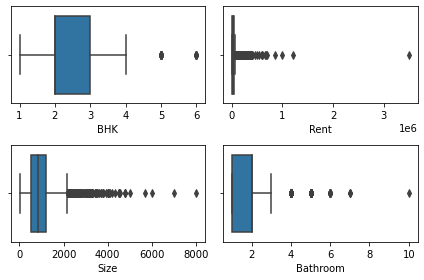

In [83]:
# Splitting data into numerical & Categorical values

Numerical_data=data.select_dtypes(include="int64")
Categorical_data=data.select_dtypes(include="object")
print("\t\tBoxplot for numerical variables")

for i in enumerate(Numerical_data.columns):
    #print(i[0])
    #print(i[1])
    plt.subplot(2,2,i[0]+1)
    sns.boxplot(x=i[1],data=data)
    plt.tight_layout()
    

Outliers are present in the data

<h2>Exploratory Data Analysis</h2>

In [84]:
pd.pivot_table(columns="City",index="Furnishing Status",values="Rent",data=data)

City,Bangalore,Chennai,Delhi,Hyderabad,Kolkata,Mumbai
Furnishing Status,,,,,,
Furnished,32531.868132,32961.666667,30214.443299,24353.153153,13865.573770,108974.527197
Semi-Furnished,26879.452055,23900.582589,33945.320144,25002.442786,11722.535211,99744.586902
Unfurnished,16408.530806,16245.303867,23725.652174,14331.267606,11189.006231,51454.458333


Insight: </br>
    1. house rental is high in Mumbai for all type(Furnished,Semi Furnished, Unfurnished)</br>
    2. Compared to other cities Kolkata is having less rental</br>
    3. In Delhi, Semi Furnished houses have more demand</br>

In [85]:
data['BHK'].value_counts()

2    2265
1    1167
3    1098
4     189
5      19
6       8
Name: BHK, dtype: int64

Insight: Demand is highr for 2BHK

<AxesSubplot:xlabel='BHK', ylabel='Rent'>

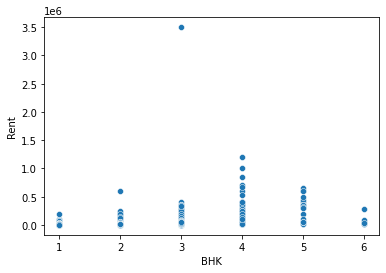

In [86]:
sns.scatterplot(x="BHK",y="Rent", data=data)

Insight:</br>
    when the BHK increases upto certain level rent is also increasing, after that it is gradually decreasing

In [87]:
data['Floor'].value_counts()

1 out of 2         379
Ground out of 2    350
2 out of 3         312
2 out of 4         308
1 out of 3         293
                  ... 
11 out of 31         1
50 out of 75         1
18 out of 26         1
12 out of 27         1
23 out of 34         1
Name: Floor, Length: 480, dtype: int64

Tenant Preferred,Bachelors,Bachelors/Family,Family
Area Type,,,
Built Area,NaN,2.0,NaN
Carpet Area,691.0,1281.0,326.0
Super Area,139.0,2161.0,146.0


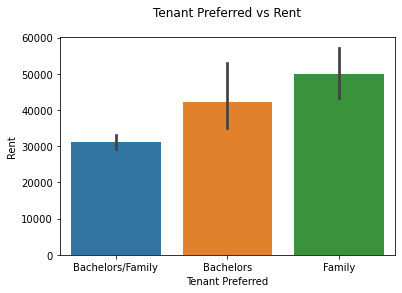

In [88]:
sns.barplot(x="Tenant Preferred",y="Rent",data=data)
plt.title("Tenant Preferred vs Rent\n")
pd.pivot_table(index='Area Type',columns="Tenant Preferred",aggfunc="count",values="Rent",data=data)

Insight: </br>
    1. Rent is Higher for Family Tenant</br>
    2. Tenant type Bachelors/Family having less Rent compared to the rest</br>
    
    

In [89]:
#bar_ref=pd.DataFrame(data['Point of Contact'].value_counts(),columns=["Point of Contact","Count"])
bar_ref=data['Point of Contact'].value_counts().to_frame().reset_index()

<AxesSubplot:xlabel='Point of Contact', ylabel='Count_s'>

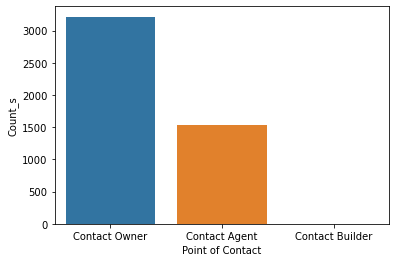

In [90]:
bar_ref.columns=['Point of Contact','Count_s']
sns.barplot(x='Point of Contact',y='Count_s',data=bar_ref)

Insight: Tennats are preferring to contact Owners directly

<h2>Handling of Outliers</h2>

<AxesSubplot:>

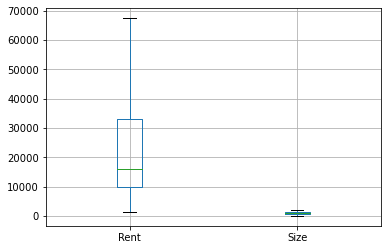

In [91]:
cont_numeric=["Rent","Size"]
desc_numeric=["BHK","Bathroom"]

for i in cont_numeric:
    Q1=np.percentile(data[i],25,interpolation="midpoint")
    Q3=np.percentile(data[i],75,interpolation="midpoint")
    IQR=Q3-Q1
    up_lim=Q3+(1.5* IQR)
    low_lim=Q1-(1.5* IQR)
    
    data.loc[data[i]>up_lim,i]=up_lim

data[cont_numeric].boxplot()

<h2>Feature Engineering</h2>

In [92]:
# Coveting Date into Day, month & year columns
new_arr=list()
arr=data[["Posted On"]]
#a="2022-05-18"
#a.split("-")
for i in range(0,len(data["Posted On"])):
    a=arr.iloc[i].to_string()
    b=a.split("-")
    new_arr.append(b)
new_arr

pd_new=pd.DataFrame(new_arr,columns=["Year","Month","Day"])
pd_new["Year"]=2022

data=data.join(pd_new)


In [93]:
#Droping Posted on Column
data.drop("Posted On", axis=1, inplace=True)

In [94]:
data_f=data.copy()

In [95]:
Rent_Floor=data["Floor"].str.split(pat=" ",n=1,expand=True).iloc[:,0]
Rent_Floor.value_counts()
#even though,Upper&Lower is basement but they still have positive value,so gave them 0.3 & 0.1
Rent_Floor=Rent_Floor.replace("Ground",'0.5')
Rent_Floor=Rent_Floor.replace("Upper",'0.3')
Rent_Floor=Rent_Floor.replace("Lower",'0.1')

Total_flr=data["Floor"].str.split(pat=" ",n=3,expand=True).iloc[:,3]

In [96]:
Total_flr.value_counts()

4        935
3        910
2        861
5        421
1        330
        ... 
62         1
of 18      1
of 20      1
of 40      1
of 5       1
Name: 3, Length: 80, dtype: int64

In [97]:
# it contain 'of' so we will remove them
Total_floor=[]

for i,j in enumerate(Total_flr):
    k=str(j).strip('of')
    Total_floor.append(k)

In [98]:
data["Rent_Floor"]=pd.DataFrame(Rent_Floor)
data['Total_Floor'] = pd.DataFrame(Total_floor)

In [99]:
data.drop(["Area Locality","Floor"],axis=1,inplace=True)

In [100]:
data

,BHK,Rent,Size,Area Type,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact,Year,Month,Day,Rent_Floor,Total_Floor
0,2,10000,1100,Super Area,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner,2022,05,18,0.5,2
1,2,20000,800,Super Area,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,2022,05,13,1,3
2,2,17000,1000,Super Area,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,2022,05,16,1,3
3,2,10000,800,Super Area,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner,2022,07,04,1,2
4,2,7500,850,Carpet Area,Kolkata,Unfurnished,Bachelors,1,Contact Owner,2022,05,09,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4741,2,15000,1000,Carpet Area,Hyderabad,Semi-Furnished,Bachelors/Family,2,Contact Owner,2022,05,18,3,5
4742,3,29000,2000,Super Area,Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Owner,2022,05,15,1,4
4743,3,35000,1750,Carpet Area,Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Agent,2022,07,10,3,5
4744,3,45000,1500,Carpet Area,Hyderabad,Semi-Furnished,Family,2,Contact Agent,2022,07,06,23,34


<h2> Label Encoding of Categorical columns<h2>

In [101]:
for_encoding=["Area Type","City","Furnishing Status","Tenant Preferred","Point of Contact"]
from sklearn.preprocessing import LabelEncoder

In [102]:
lbl=LabelEncoder()

In [103]:
for i in for_encoding:
    data[i]=lbl.fit_transform(data[i])

In [104]:
data

,BHK,Rent,Size,Area Type,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact,Year,Month,Day,Rent_Floor,Total_Floor
0,2,10000,1100,2,4,2,1,2,2,2022,05,18,0.5,2
1,2,20000,800,2,4,1,1,1,2,2022,05,13,1,3
2,2,17000,1000,2,4,1,1,1,2,2022,05,16,1,3
3,2,10000,800,2,4,2,1,1,2,2022,07,04,1,2
4,2,7500,850,1,4,2,0,1,2,2022,05,09,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4741,2,15000,1000,1,3,1,1,2,2,2022,05,18,3,5
4742,3,29000,2000,2,3,1,1,3,2,2022,05,15,1,4
4743,3,35000,1750,1,3,1,1,3,0,2022,07,10,3,5
4744,3,45000,1500,1,3,1,2,2,0,2022,07,06,23,34


In [105]:
#Some 'Tatal floor'  valus is None ,because it is rented the whole building. So replace None with 'Rent_Floor'
data.loc[data["Total_Floor"]=='None']

,BHK,Rent,Size,Area Type,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact,Year,Month,Day,Rent_Floor,Total_Floor
2553,2,20000,400,2,2,2,1,1,2,2022,06,18,3,None
2883,1,18000,450,1,2,0,1,1,2,2022,05,23,0.5,None
4490,3,15000,900,2,3,1,1,3,2,2022,06,12,1,None
4560,3,15000,1270,1,3,0,2,2,2,2022,05,31,1,None


In [106]:
data.loc[data["Total_Floor"]=='None']["Total_Floor"].index
#=data.loc[data["Total_Floor"]=='None']["Rent_Floor"]

Int64Index([2553, 2883, 4490, 4560], dtype='int64')

In [107]:
#data.loc[data["Total_Floor"]=='None']["Rent_Floor"]
index_arr=[2553, 2883, 4490, 4560]
for i in index_arr:
    data.loc[i,"Total_Floor"]=data.loc[i,"Rent_Floor"]

In [109]:
#data["Total_Floor"]=="None"

In [110]:
data.loc[data["Total_Floor"]=='None']

,BHK,Rent,Size,Area Type,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact,Year,Month,Day,Rent_Floor,Total_Floor


<h2>Splitting the Data into independent & dependant columns for Modeling</h2>

In [111]:
y=data["Rent"]
x=data.drop(["Rent"], axis=1)

In [112]:
from sklearn.model_selection import train_test_split

In [113]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2, random_state=42)

In [114]:
x_train.head()

,BHK,Size,Area Type,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact,Year,Month,Day,Rent_Floor,Total_Floor
1995,2,950,2,0,1,1,2,2,2022,05,10,6,8
1497,2,800,2,0,1,1,2,2,2022,06,23,3,4
2763,1,545,2,2,0,1,1,2,2022,06,13,2,3
1351,1,465,2,5,1,0,1,2,2022,07,07,3,4
1862,2,900,2,0,0,1,2,2,2022,07,04,4,5


<h2>Modeling</h2>

In [148]:
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.linear_model import Ridge,Lasso
from sklearn.metrics import mean_squared_error

In [149]:
#Find the best value of K
arr=[]

for i in range(1,15):
    model=KNeighborsRegressor(n_neighbors=i, metric="minkowski")
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    acc=np.sqrt(mean_squared_error(y_test,y_pred))
    print(i,acc)
    

1 14833.809579186965
2 12882.033411612265
3 12513.113804862893
4 12294.03946218772
5 12175.527869280291
6 12116.123054251317
7 12099.17239441857
8 12177.18522772318
9 12390.666205962307
10 12498.314574663342
11 12655.275399607244
12 12710.226464564914
13 12818.71631159167
14 12862.963143816994


Insight: RMSE is low for n_neighbors=7

In [151]:
models = {
    'ridge' : Ridge(),
    'gradient boosting' : GradientBoostingRegressor(),
    'lasso' : Lasso(),
    'random forest' : RandomForestRegressor(),
    'support vector': SVR(),
    'knn' : KNeighborsRegressor(n_neighbors = 7)
}

In [153]:
result={}
for name,model in models.items():
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    acc=np.sqrt(mean_squared_error(y_test,y_pred))
    result[name]=acc

In [154]:
result

{'ridge': 10220.799293822089,
 'gradient boosting': 7587.216377956336,
 'lasso': 10220.711178494237,
 'random forest': 7572.804600399535,
 'support vector': 21307.987478918058,
 'knn': 12099.17239441857}

Conclusion:</br>
    We can go for Gradient Boosting or Random Forest.modeling, since it have the lowest RMSE value compared to other model


Notes</br>
R2 score:

An R2 score is the value which shows how good it fits your training data. </br>
However there’s a difference between fitting and optimal fitting.</br>
When it comes to predictability efficiency of a model, the R2 score becomes invalid because it is a measure of how well your training data fits the model and nothing about the predictability.

While R Square is a relative measure of how well the model fits dependent variables, Mean Square Error is an absolute measure of the goodness for the fit. MSE is calculated by the sum of square of prediction error which is real output minus predicted output and then divide by the number of data points.

High RMSE is “bad” and a low RMSE is “good”.

We can go for model having Low RMSE & high R² scores.